# Лабораторна робота 5
### Студента групи МІТ-31 (підгрупа 1)
### Байди Данила Андрійовича
## Завдання
1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

In [41]:
model = pd.read_csv("./drinking_water_potability.csv")

In [43]:
insurance = model_1
insurance = insurance.replace(np.nan, 0)
insurance = insurance.astype({"ph": "int64"})
insurance = insurance.astype({"Hardness": "int64"})
insurance = insurance.astype({"Solids": "int64"})
insurance = insurance.astype({"Chloramines": "int64"})
insurance = insurance.astype({"Sulfate": "int64"})
insurance = insurance.astype({"Conductivity": "int64"})
insurance = insurance.astype({"Organic_carbon": "int64"})
insurance = insurance.astype({"Trihalomethanes": "int64"})
insurance = insurance.astype({"Turbidity": "int64"})
insurance.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,204,20791,7,368,564,10,86,2,0
1,3,129,18630,6,0,592,15,56,4,0
2,8,224,19909,9,0,418,16,66,3,0
3,8,214,22018,8,356,363,18,100,4,0
4,9,181,17978,6,310,398,11,31,4,0


In [44]:
insurance.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [45]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,204,20791,7,368,564,10,86,2,0
1,3,129,18630,6,0,592,15,56,4,0
2,8,224,19909,9,0,418,16,66,3,0


In [46]:
X=insurance.drop("Solids",axis=1)
y=insurance["Solids"]

X.head(), y.head()

(   ph  Hardness  Chloramines  Sulfate  Conductivity  Organic_carbon  \
 0   0       204            7      368           564              10   
 1   3       129            6        0           592              15   
 2   8       224            9        0           418              16   
 3   8       214            8      356           363              18   
 4   9       181            6      310           398              11   
 
    Trihalomethanes  Turbidity  Potability  
 0               86          2           0  
 1               56          4           0  
 2               66          3           0  
 3              100          4           0  
 4               31          4           0  ,
 0    20791
 1    18630
 2    19909
 3    22018
 4    17978
 Name: Solids, dtype: int64)

In [47]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(2620, 9)

In [48]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
82/82 [==============================] - 0s 669us/step - loss: 545619904.0000 - mse: 545619904.0000
Epoch 2/10
82/82 [==============================] - 0s 924us/step - loss: 526494464.0000 - mse: 526494464.0000
Epoch 3/10
82/82 [==============================] - 0s 814us/step - loss: 497574528.0000 - mse: 497574528.0000
Epoch 4/10
82/82 [==============================] - 0s 820us/step - loss: 458005024.0000 - mse: 458005024.0000
Epoch 5/10
82/82 [==============================] - 0s 754us/step - loss: 410455200.0000 - mse: 410455200.0000
Epoch 6/10
82/82 [==============================] - 0s 742us/step - loss: 358405408.0000 - mse: 358405408.0000
Epoch 7/10
82/82 [==============================] - 0s 742us/step - loss: 305879104.0000 - mse: 305879104.0000
Epoch 8/10
82/82 [==============================] - 0s 742us/step - loss: 256060160.0000 - mse: 256060160.0000
Epoch 9/10
82/82 [==============================] - 0s 876us/step - loss: 211703888.0000 - mse: 211703888.0000
E

In [49]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 570us/step - loss: 87942560.0000 - mse: 87942560.0000


In [50]:
ins_model.save("i_mod.h5")

ins_model_loaded=tf.keras.models.load_model("i_mod.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
263,13,47,8,375,500,12,0,4,1
1683,8,239,5,0,574,17,56,3,0
1880,0,187,7,0,507,18,79,5,0
621,0,193,6,342,430,17,49,2,0
2347,5,183,5,394,446,17,50,3,1


In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model_1
insurance2 = insurance2.replace(np.nan, 0)
insurance2 = insurance2.astype({"ph": "int64"})
insurance2 = insurance2.astype({"Hardness": "int64"})
insurance2 = insurance2.astype({"Solids": "int64"})
insurance2 = insurance2.astype({"Chloramines": "int64"})
insurance2 = insurance2.astype({"Sulfate": "int64"})
insurance2 = insurance2.astype({"Conductivity": "int64"})
insurance2 = insurance2.astype({"Organic_carbon": "int64"})
insurance2 = insurance2.astype({"Trihalomethanes": "int64"})
insurance2 = insurance2.astype({"Turbidity": "int64"})
insurance2.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,204,20791,7,368,564,10,86,2,0
1,3,129,18630,6,0,592,15,56,4,0


In [52]:
ct = make_column_transformer(
    (MinMaxScaler(),["Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes"]), 
    (OneHotEncoder(handle_unknown="ignore"),['Turbidity','Potability'])
)
X=insurance2.drop("Solids", axis=1)
y = insurance2["Solids"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [53]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

21/21 [==============================] - 0s 713us/step - loss: 7153.3193 - mae: 7153.3193


(2620, 9)

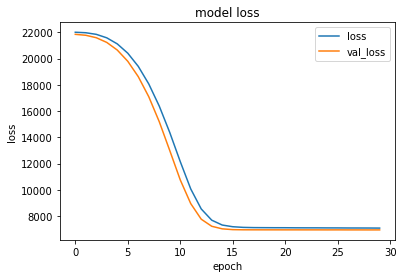

In [54]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [55]:
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns

In [56]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [57]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [58]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [59]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [60]:
train_labels[7]

2

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [62]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3435 - accuracy: 0.1112 - val_loss: 2.1740 - val_accuracy: 0.1685
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8309 - accuracy: 0.2709 - val_loss: 1.4544 - val_accuracy: 0.3859
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3292 - accuracy: 0.4112 - val_loss: 1.2751 - val_accuracy: 0.4219
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2133 - accuracy: 0.4613 - val_loss: 1.1709 - val_accuracy: 0.5071
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1437 - accuracy: 0.4993 - val_loss: 1.1330 - val_accuracy: 0.5234
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1087 - accuracy: 0.5234 - val_loss: 1.1105 - val_accuracy: 0.5450
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0856 - accuracy: 0.5326 - val_loss: 1.0955 - val_accuracy:

In [63]:
train_data.min(), train_data.max()

# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [64]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0356 - accuracy: 0.6072 - val_loss: 0.8064 - val_accuracy: 0.6999
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7003 - accuracy: 0.7554 - val_loss: 0.6837 - val_accuracy: 0.7743
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6300 - accuracy: 0.7885 - val_loss: 0.6353 - val_accuracy: 0.7889
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5927 - accuracy: 0.8003 - val_loss: 0.6081 - val_accuracy: 0.7953
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5719 - accuracy: 0.8060 - val_loss: 0.5858 - val_accuracy: 0.8014
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5574 - accuracy: 0.8102 - val_loss: 0.5770 - val_accuracy: 0.8042
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5482 - accuracy: 0.8129 - val_loss: 0.5787 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

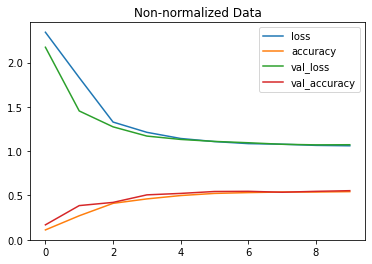

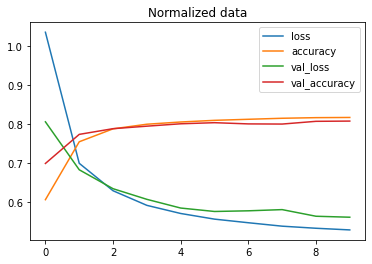

In [65]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [66]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2051 - accuracy: 0.5516 - val_loss: 0.9143 - val_accuracy: 0.6610
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8128 - accuracy: 0.7138 - val_loss: 0.7532 - val_accuracy: 0.7324
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6833 - accuracy: 0.7516 - val_loss: 0.6833 - val_accuracy: 0.7469
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6405 - accuracy: 0.7655 - val_loss: 0.6547 - val_accuracy: 0.7606
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6202 - accuracy: 0.7739 - val_loss: 0.6517 - val_accuracy: 0.7659
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6092 - accuracy: 0.7775 - val_loss: 0.6304 - val_accuracy: 0.7692
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6007 - accuracy: 0.7799 - val_loss: 0.6298 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

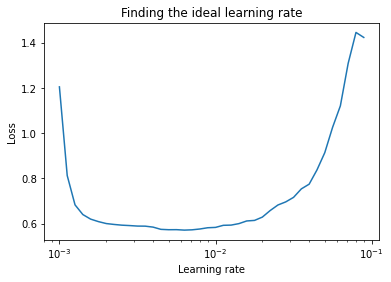

In [67]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [69]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7350 - accuracy: 0.2307 - val_loss: 1.5864 - val_accuracy: 0.2829
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5418 - accuracy: 0.3097 - val_loss: 1.5160 - val_accuracy: 0.3281
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3705 - accuracy: 0.4042 - val_loss: 1.0726 - val_accuracy: 0.5453
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9681 - accuracy: 0.5964 - val_loss: 0.9299 - val_accuracy: 0.6186
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8917 - accuracy: 0.6300 - val_loss: 0.8933 - val_accuracy: 0.6430
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8504 - accuracy: 0.6555 - val_loss: 0.8505 - val_accuracy: 0.6619
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8134 - accuracy: 0.6690 - val_loss: 0.8311 - val_accuracy:

In [70]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [71]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[7.82817011e-08, 5.46434398e-10, 7.08728909e-11, 4.06564068e-05,
        9.12127796e-09, 1.72481045e-01, 7.73300872e-06, 1.05147816e-01,
        1.53924944e-02, 7.06930161e-01],
       [3.20323743e-02, 4.08265208e-07, 4.29792315e-01, 1.04120548e-03,
        3.55354905e-01, 1.90544796e-07, 1.79060832e-01, 1.03233977e-09,
        2.71782442e-03, 2.94636288e-10],
       [6.16867192e-06, 9.94800806e-01, 1.10034533e-13, 3.74275609e-03,
        8.78266698e-13, 1.35498442e-06, 3.50109997e-10, 1.44889939e-03,
        4.39156132e-15, 9.96437915e-12],
       [7.80674441e-07, 9.97402608e-01, 2.21586699e-15, 1.15441321e-03,
        2.18575412e-14, 4.47667475e-07, 1.60032421e-11, 1.44166022e-03,
        1.07909900e-16, 2.08552012e-12],
       [1.99176311e-01, 4.43312019e-05, 2.16781661e-01, 2.37711109e-02,
        2.50946701e-01, 6.87950569e-06, 3.06691080e-01, 1.57681569e-07,
        2.58179102e-03, 6.27905461e-09]], dtype=float32)

In [72]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [73]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 2, 8, 5, 7], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[748,   0,  68,  66,  11,   7,  91,   0,   9,   0],
       [ 19, 906,   5,  62,   2,   0,   5,   0,   1,   0],
       [ 42,   0, 827,   3,  41,   1,  77,   0,   9,   0],
       [231,  35,  23, 630,   8,   1,  67,   0,   5,   0],
       [ 46,   0, 660,  11, 110,   3, 158,   0,  12,   0],
       [  0,   0,   0,  11,   0, 911,   0,  52,  14,  12],
       [217,   0, 261,  23,  90,   5, 360,   0,  44,   0],
       [  0,   0,   0,   6,   0,  89,   0, 839,   0,  66],
       [  1,   0,  14,   9,   4,  44,  28,   3, 894,   3],
       [  0,   0,   0,   0,   0,  31,   0,  35,  18, 916]], dtype=int64)

In [75]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [76]:
model_14.layers

In [77]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.07412487, -0.06533302, -0.49624655,  0.5588567 ],
        [ 0.03573839, -0.08554915, -0.0070035 ,  1.2996769 ],
        [-0.06760239,  0.19950406, -1.3602498 ,  0.5130117 ],
        ...,
        [ 0.00543382,  0.3343258 , -0.05106543, -0.05640382],
        [ 0.05481194, -0.44262043,  0.36522502, -0.01095108],
        [ 0.03230124, -0.5303721 , -0.22664301, -0.20406808]],
       dtype=float32),
 (784, 4))

In [78]:
biases, biases.shape

(array([-0.01768141,  0.26558354,  2.1746824 ,  2.9452262 ], dtype=float32),
 (4,))

In [79]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_21 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
